In [1]:
import numpy as np
import pandas as pd

import math
from scipy.special import gamma

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from IPython.display import display

import os
import re
import json

In [2]:
def process_file(file_name, data_dict):
    with open(file_name) as json_data:
        data = json.load(json_data)
    tag_length = len(data['tags'])
    similars_length = len(data['similars'])
    key_str = file_name.split('/')[-1][:-5]
    data_dict[key_str] = data
    return data_dict

In [3]:
def generate_file_list(directory):
    file_list = []
    #this loop properly gets all files in the directory
    for directory, sub_dirs, files in os.walk(directory):
        for name in files:
            if name[-4:] == 'json':
                file_list.append(directory + '/' + name)
    return file_list

In [5]:
def parse_data(data):
    similars_list = []
    tags_list = []
    songs_list = []
    for key, song in data.items():
        songs_list.append([song['artist'], song['timestamp'], song['track_id'], song['title']])
        for similar_list in song['similars']:
            similars_list.append([key]+similar_list)
        for tag_list in song['tags']:
            tags_list.append([key, re.sub('[^a-z0-9 ]+','',tag_list[0].lower()), tag_list[1]])
        
    similars_df = pd.DataFrame(similars_list, columns=['track_id1', 'track_id2', 'similarity'])
    tags_df = pd.DataFrame(tags_list, columns=['track_id', 'tag', 'strength'])
    songs_df = pd.DataFrame(songs_list, columns=['artist', 'timestamp', 'track_id', 'title'])
    
    return similars_df, tags_df, songs_df

In [6]:
def process_data(directory_in, save_to_disk=True, 
                 similars_file_out='data/similars_df.json', 
                 tags_file_out='data/tags_df.json', 
                 songs_file_out='data/songs_df.json'):
    #retrieve list of all json files in directory and subdirectories
    print('Generating File List')
    file_list = generate_file_list(directory_in)
    #extract data from json files into dict
    data= {}
    print('Reading data from files')
    for name in file_list:
        data = process_file(name, data)
    #parse data into three separate dataframes
    print('Putting Data into dataframes')
    similars_df, tags_df, songs_df = parse_data(data)
    
    if save_to_disk == True:
        #save dataframes for later use
        print('Saving data to disk')
        similars_df.to_json(similars_file_out)
        tags_df.to_json(tags_file_out)
        songs_df.to_json(songs_file_out)
    return similars_df, tags_df, songs_df

In [46]:
similars_df, tags_df, songs_df = \
process_data('data/lastfm_train/', True, 'data/similars_train.json',\
             'data/tags_train.json', 'data/songs_train.json')

Generating File List
Reading data from files
Putting Data into dataframes


In [2]:
tags_df = pd.read_json('data/tags_train.json')

In [10]:
display(tags_df.head())
display(tags_df.shape)

,track_id,tag,strength
0,TRAAAAK128F9318786,alternative rock,100
1,TRAAAAK128F9318786,rock,60
10,TRAAAAW128F429D538,hieroglyiphics,100
100,TRAAAED128E0783FAB,jazz vocal 2,1
1000,TRAABVM128F92CA9DC,love,22


(7671133, 3)

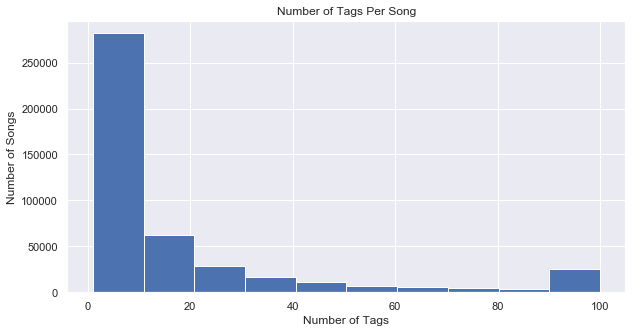

In [4]:
tags_per_song = tags_df['track_id'].value_counts()
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(tags_per_song)
ax.set_title('Number of Tags Per Song')
ax.set_ylabel('Number of Songs')
ax.set_xlabel('Number of Tags')
plt.show()

In [ ]:
songs_df = pd.read_json('data/songs_train.json')

In [9]:
display(songs_df.head())
display(songs_df.shape)

,artist,timestamp,track_id,title
0,Adelitas Way,2011-08-15 09:59:32.436152,TRAAAAK128F9318786,Scream
1,Western Addiction,2011-08-12 13:00:44.771968,TRAAAAV128F421A322,A Poor Recipe For Civic Cohesion
10,Son Kite,2011-08-10 19:36:13.851544,TRAAAEM128F93347B9,Game & Watch
100,Lost Immigrants,2011-08-02 09:37:00.958971,TRAACEI128F930C60E,Memories & Rust
1000,The Irish Tenors,2011-08-03 03:38:35.708526,TRAATLC12903D0172B,Mountains Of Mourne


(839122, 4)

In [ ]:
#not enough ram to execute, need to find alternate solution.
#Dataframe is loaded after running the process_data function.
similars_df = pd.read_json('data/similars_train.json')
display(similars_df.head())

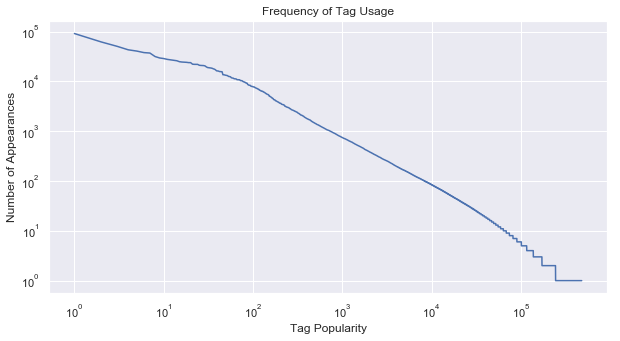

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
tag_counts = tags_df['tag'].value_counts()
tag_counts_gt5 = tag_counts[tag_counts>5]
ax.plot(np.arange(tag_counts.shape[0])+1, tag_counts)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Frequency of Tag Usage')
ax.set_xlabel('Tag Popularity')
ax.set_ylabel('Number of Appearances')
# ax[0].plot(np.arange(tag_counts.shape[0])+1, tag_counts)
# ax[0].set_yscale('log')
# ax[0].set_xscale('log')
# ax[0].set_title('Frequency of Tag Usage')
# ax[0].set_xlabel('Tag Popularity')
# ax[0].set_ylabel('Number of Appearances')
# ax[1].plot(np.arange(tag_counts_gt5.shape[0]), tag_counts_gt5)
# ax[1].set_yscale('log')
# ax[1].set_xscale('log')
# ax[1].set_title('Frequency of Tag Usage')
# ax[1].set_xlabel('Tag Popularity')
# ax[1].set_ylabel('Number of Appearances')
plt.show()

In [5]:
data = [[i, w] for i, w in tag_counts[0:10].items()]

In [7]:
pd.DataFrame(data, columns=['Tag', 'Usage Count'], index=np.arange(1,11))

,Tag,Usage Count
1,rock,91222
2,pop,61775
3,alternative,50568
4,indie,43037
5,electronic,40525
6,female vocalists,37804
7,favorites,37029
8,love,31497
9,dance,29495
10,00s,28699
